# Draw Confusion Matrix
draw confusion martrix from saved .pt file.  
Notice: you should change the gait_cycle, sampling, and pref_path keyword first, then run all cells.

In [4]:
# dict for title/res path pair 
# running on pegasus
# 2025-06027 first run

pegasus = {
	"pose_atn_0":
		"/home/SKIING/chenkaixu/code/ClinicalGait-CrossAttention_ASD_PyTorch/logs/3dcnn_attn_map_True_pose_atn_0/2025-06-27/01-41-04/best_preds",
	"pose_atn_1":
		"/home/SKIING/chenkaixu/code/ClinicalGait-CrossAttention_ASD_PyTorch/logs/3dcnn_attn_map_True_pose_atn_1/2025-06-27/01-40-27/best_preds",
	"pose_atn_2":
		"/home/SKIING/chenkaixu/code/ClinicalGait-CrossAttention_ASD_PyTorch/logs/3dcnn_attn_map_True_pose_atn_2/2025-06-27/01-41-04/best_preds",
	"pose_atn_3":
		"/home/SKIING/chenkaixu/code/ClinicalGait-CrossAttention_ASD_PyTorch/logs/3dcnn_attn_map_True_pose_atn_3/2025-06-27/01-42-44/best_preds",
	"pose_atn_4":
		"/home/SKIING/chenkaixu/code/ClinicalGait-CrossAttention_ASD_PyTorch/logs/3dcnn_attn_map_True_pose_atn_4/2025-06-27/01-57-08/best_preds",
	"pose_atn_5":
		"/home/SKIING/chenkaixu/code/ClinicalGait-CrossAttention_ASD_PyTorch/logs/3dcnn_attn_map_True_pose_atn_5/2025-06-27/01-57-08/best_preds",
}

****************************************************************************************************
pegasus, pose_atn_0
fold: 7
****************************************************************************************************
pose_atn_0
accuracy: tensor(0.6809)
precision: tensor(0.7061)
recall: tensor(0.6809)
f1_score: tensor(0.6621)
aurroc: tensor(0.8346)
_confusion_matrix: tensor([[0.8817, 0.0702, 0.0481],
        [0.3497, 0.5591, 0.0912],
        [0.3218, 0.0764, 0.6018]])
####################################################################################################


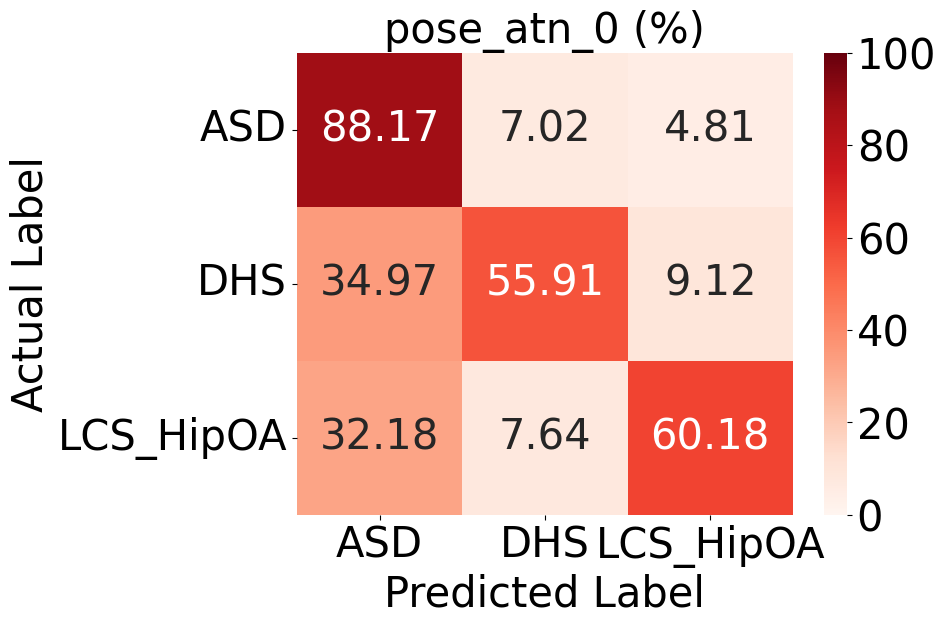

****************************************************************************************************
pegasus, pose_atn_1
fold: 7
****************************************************************************************************
pose_atn_1
accuracy: tensor(0.6384)
precision: tensor(0.6853)
recall: tensor(0.6384)
f1_score: tensor(0.6263)
aurroc: tensor(0.7421)
_confusion_matrix: tensor([[0.8236, 0.0534, 0.1230],
        [0.2909, 0.4419, 0.2672],
        [0.3287, 0.0217, 0.6496]])
####################################################################################################


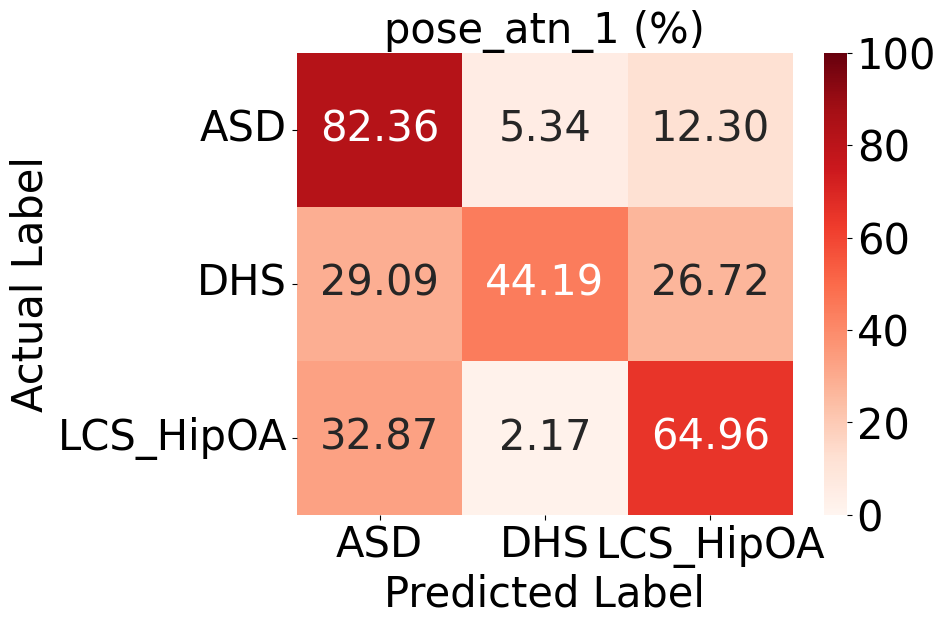

****************************************************************************************************
pegasus, pose_atn_2
fold: 8
****************************************************************************************************
pose_atn_2
accuracy: tensor(0.5274)
precision: tensor(0.5443)
recall: tensor(0.5274)
f1_score: tensor(0.5160)
aurroc: tensor(0.6757)
_confusion_matrix: tensor([[0.6732, 0.0965, 0.2303],
        [0.3837, 0.4335, 0.1828],
        [0.3937, 0.1307, 0.4756]])
####################################################################################################


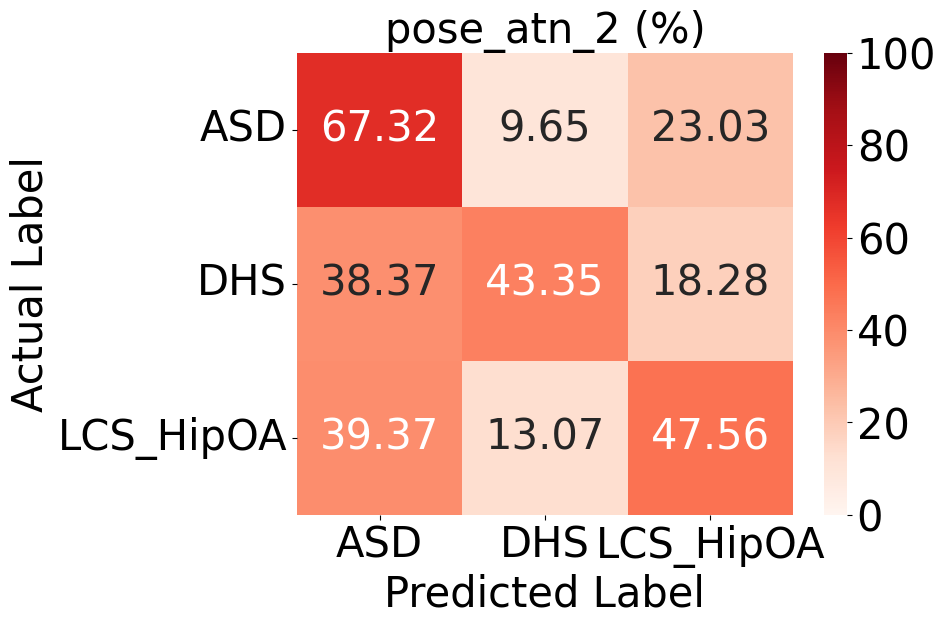

****************************************************************************************************
pegasus, pose_atn_3
fold: 10
****************************************************************************************************
pose_atn_3
accuracy: tensor(0.4552)
precision: tensor(0.6659)
recall: tensor(0.4552)
f1_score: tensor(0.3790)
aurroc: tensor(0.6345)
_confusion_matrix: tensor([[0.9564, 0.0052, 0.0384],
        [0.8133, 0.0774, 0.1094],
        [0.6643, 0.0038, 0.3319]])
####################################################################################################


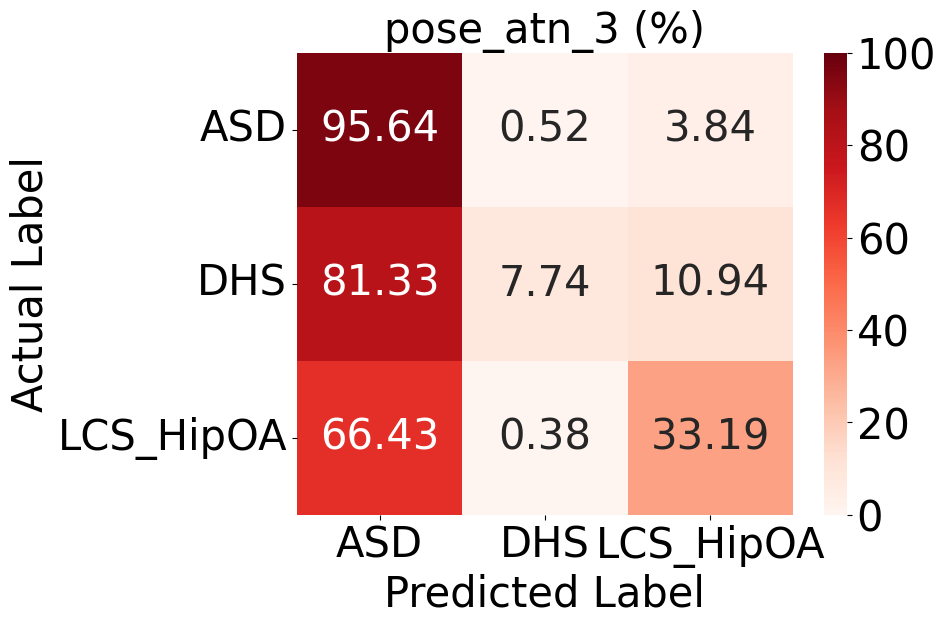

****************************************************************************************************
pegasus, pose_atn_4
fold: 9
****************************************************************************************************
pose_atn_4
accuracy: tensor(0.4506)
precision: tensor(0.4336)
recall: tensor(0.4506)
f1_score: tensor(0.4322)
aurroc: tensor(0.5957)
_confusion_matrix: tensor([[0.6355, 0.0932, 0.2713],
        [0.5887, 0.1741, 0.2372],
        [0.1931, 0.2647, 0.5422]])
####################################################################################################


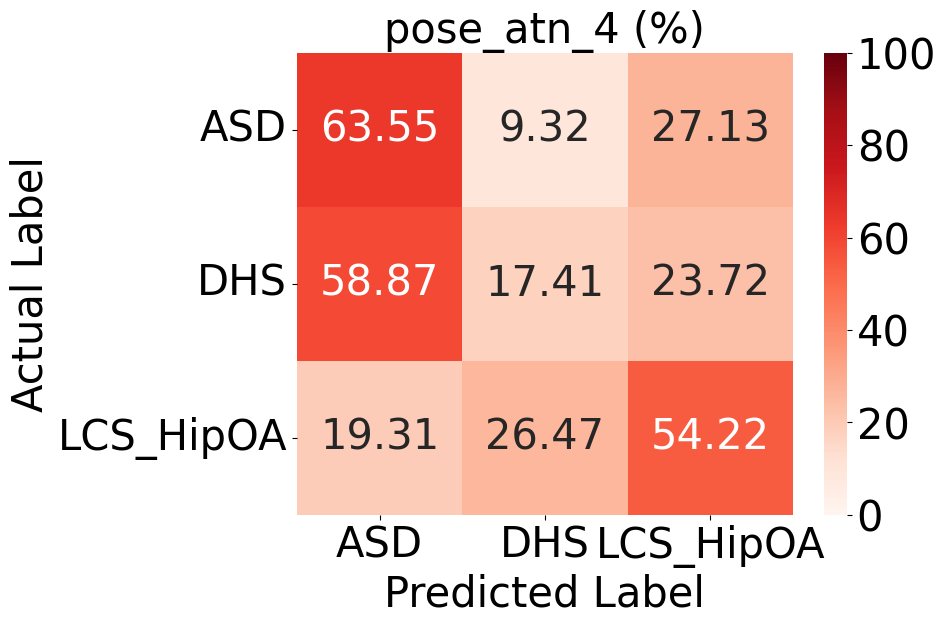

****************************************************************************************************
pegasus, pose_atn_5
fold: 6
****************************************************************************************************
pose_atn_5
accuracy: tensor(0.4938)
precision: tensor(0.4964)
recall: tensor(0.4938)
f1_score: tensor(0.4924)
aurroc: tensor(0.6670)
_confusion_matrix: tensor([[0.4573, 0.2997, 0.2430],
        [0.2906, 0.4860, 0.2235],
        [0.1491, 0.3127, 0.5381]])
####################################################################################################


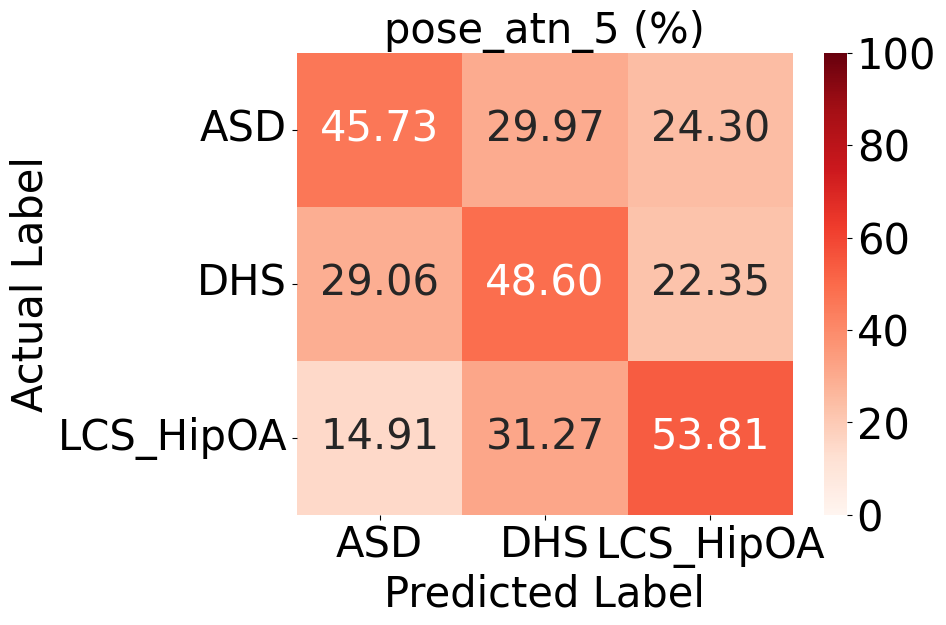

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch 
from pathlib import Path

from torchmetrics.classification import (
MulticlassAccuracy,
MulticlassPrecision,
MulticlassRecall,
MulticlassF1Score,
MulticlassConfusionMatrix,
MulticlassAUROC,
)

# analysis with title/res path pair

def analysis_with_title_res_path_pair(pair: dict, flag: str = "with_attn_loss"):

	for title, res_path in pair.items():
		
		fold = 0
		print('*' * 100)
		print(f"{flag}, {title}")
		all_label = []
		all_pred = []
		
		fold = int(len(list(Path(res_path).iterdir())) / 2 )

		print(f"fold: {fold}")

		for i in range(fold):
			label = torch.load(f"{res_path}/{i}_label.pt", map_location="cpu").to(torch.int)
			pred = torch.load(f"{res_path}/{i}_pred.pt", map_location="cpu")
			all_label.append(label)
			all_pred.append(pred)

		all_label = torch.cat(all_label, dim=0)
		all_pred = torch.cat(all_pred, dim=0)
		
		print('*' * 100)
		print(title)
		confusion_matrix_data = metrics(all_pred, all_label, num_class=3)
		print('#' * 100)

		plt.rcParams.update({'font.size': 30, 'font.family': 'sans-serif'})
		axis_labels = ['ASD', 'DHS', 'LCS_HipOA']

		# draw confusion matrix
		plt.figure(figsize=(8, 6))
		sns.heatmap(confusion_matrix_data, annot=True, fmt='.2f', cmap='Reds', xticklabels=axis_labels, yticklabels=axis_labels, vmin=0, vmax=100)
		# plt.title(f'{title} (%)', fontsize=30)
		plt.title(f"{title} (%)", fontsize=30)
		plt.ylabel('Actual Label', fontsize=30)
		plt.xlabel('Predicted Label', fontsize=30)
		plt.show()
    	

def metrics(all_pred: torch.Tensor, all_label: torch.Tensor, num_class: int = 3):

	# define metrics 
	_accuracy = MulticlassAccuracy(num_class)
	_precision = MulticlassPrecision(num_class)
	_recall = MulticlassRecall(num_class)
	_f1_score = MulticlassF1Score(num_class)
	_auroc = MulticlassAUROC(num_class)
	_confusion_matrix = MulticlassConfusionMatrix(num_class, normalize="true")

	print('accuracy: %s' % _accuracy(all_pred, all_label))
	print('precision: %s' % _precision(all_pred, all_label))
	print('recall: %s' % _recall(all_pred, all_label))
	print('f1_score: %s' % _f1_score(all_pred, all_label))
	print('aurroc: %s' % _auroc(all_pred, all_label))
	print('_confusion_matrix: %s' % _confusion_matrix(all_pred, all_label))

	return _confusion_matrix(all_pred, all_label).cpu().numpy() * 100

analysis_with_title_res_path_pair(pegasus, flag="pegasus")